### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [106]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [107]:
initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [108]:
initial_data.shape[0] == processed_data.shape[0]

True

In [109]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [110]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [111]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [112]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

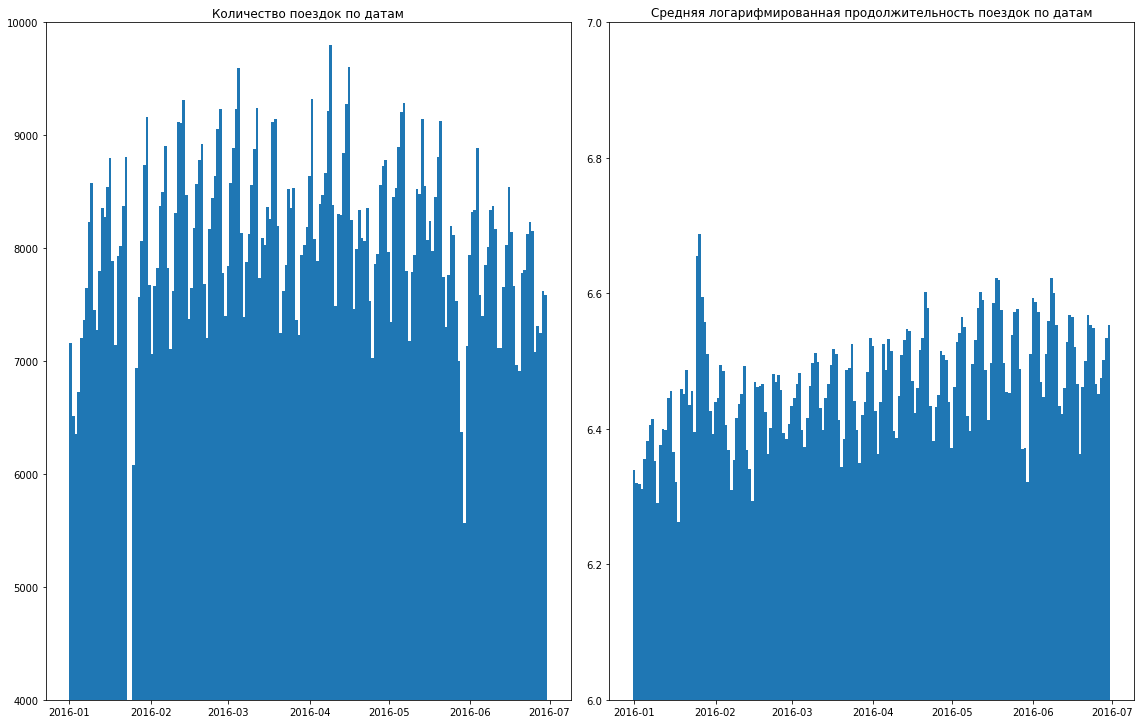

In [113]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


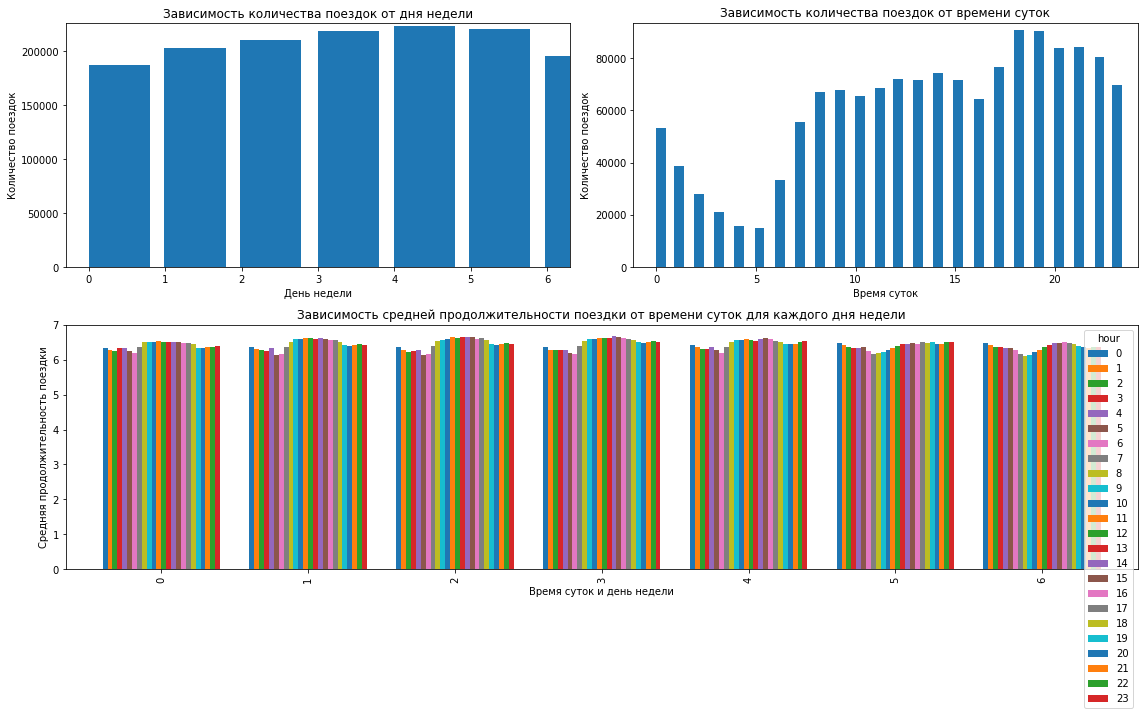

In [114]:
### Your code is here

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(2, 2, 1)
plt.hist(processed_data['day_of_week'], bins=processed_data.date.unique().shape[0], width=0.8)
plt.ylim(0, processed_data['day_of_week'].value_counts().max() + 3000)
ax_1.set_title('Зависимость количества поездок от дня недели')
ax_1.set_xlabel('День недели')
ax_1.set_ylabel('Количество поездок')


ax_2 = fig.add_subplot(2, 2, 2)
plt.hist(processed_data['hour'], bins=processed_data.date.unique().shape[0], width=0.5)
plt.ylim(0, processed_data['hour'].value_counts().max() + 3000)
ax_2.set_title('Зависимость количества поездок от времени суток')
ax_2.set_xlabel('Время суток')
ax_2.set_ylabel('Количество поездок')


ax_3 = fig.add_subplot(2, 1, 2)
avg_trip_duration = processed_data.groupby(['day_of_week', 'hour'])['log_trip_duration'].mean().unstack()
avg_trip_duration.plot(kind='bar', ax=ax_3, width=0.8, color=sns.color_palette('tab10', 24))
ax_3.set_title('Зависимость средней продолжительности поездки от времени суток для каждого дня недели')
ax_3.set_xlabel('Время суток и день недели')
ax_3.set_ylabel('Средняя продолжительность поездки')
plt.ylim((0, 7))

fig.tight_layout()

plt.show()


Text(0, 0.5, 'Количество поездок')

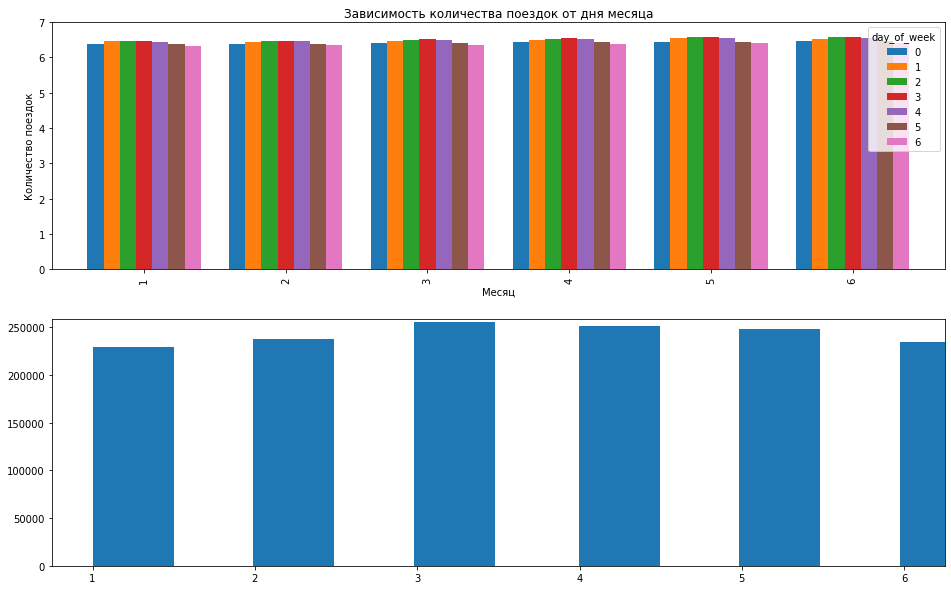

In [115]:
### Создадим первый бинарный признак
### Your code is here
fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(2, 1, 1)
avg_trip_duration_month = processed_data.groupby(['month', 'day_of_week'])['log_trip_duration'].mean().unstack()
avg_trip_duration_month.plot(kind='bar', ax=ax_1, width=0.8, color=sns.color_palette('tab10', 30))
ax_1.set_title('Зависимость средней продолжительности поездки от дня месяца')
ax_1.set_xlabel('Mесяц')
ax_1.set_ylabel('Средняя продолжительность поездки')
plt.ylim((0, 7))

ax_2 = fig.add_subplot(2, 1, 2)
plt.hist(processed_data['month'], bins=processed_data.date.unique().shape[0], width=0.5)
plt.ylim(0, processed_data['month'].value_counts().max() + 3000)
ax_1.set_title('Зависимость количества поездок от дня месяца')
ax_1.set_xlabel('Месяц')
ax_1.set_ylabel('Количество поездок')

In [116]:
print(processed_data['month'].unique())

[3 6 1 4 5 2]


Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [117]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


In [118]:
print(processed_data['date'][processed_data['month'] == 1])

id
id3858529    2016-01-19
id0801584    2016-01-30
id3970352    2016-01-09
id1870624    2016-01-05
id3188770    2016-01-03
                ...    
id3369208    2016-01-18
id3730733    2016-01-25
id0155863    2016-01-17
id1049543    2016-01-10
id2714485    2016-01-05
Name: date, Length: 229707, dtype: object


In [119]:
strom_ = processed_data.groupby('date').size().idxmin()
print(strom_)

2016-01-23


In [120]:
storm_date = pd.to_datetime(strom_).date()
print(storm_date)

2016-01-23


In [121]:
### Создадим первый бинарный признак
### Your code is here
processed_data['anomaly'] = (processed_data['date']==storm_date).astype(int)
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly
id,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0


In [122]:
print(processed_data['date'][processed_data['anomaly']==1])

id
id1027675    2016-01-23
id2657420    2016-01-23
id3382236    2016-01-23
id2636301    2016-01-23
id0252677    2016-01-23
                ...    
id2645547    2016-01-23
id1907515    2016-01-23
id1950275    2016-01-23
id2600978    2016-01-23
id3905294    2016-01-23
Name: date, Length: 1648, dtype: object


In [123]:
### Создадим второй бинарный признак
### Your code is here
'''
Является ли время поездки статистически самым проблемным, то есть час пиком?
Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" 
среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, 
то ставим 1. Иначе - 0.
'''
avg_day_of_week_hour = processed_data.groupby(['day_of_week', 'hour'])['log_trip_duration'].mean().reset_index()
the_biggest_couple = avg_day_of_week_hour.sort_values(by='log_trip_duration', ascending=False).head(10)
print(the_biggest_couple)
top_10_set = set(zip(the_biggest_couple['day_of_week'], the_biggest_couple['hour']))
processed_data['traffic_jam'] = processed_data.apply(lambda x: 1 if (x['day_of_week'], x['hour']) in top_10_set else 0,
                                                    axis=1)

     day_of_week  hour  log_trip_duration
86             3    14           6.669526
87             3    15           6.650622
63             2    15           6.647091
59             2    11           6.644226
61             2    13           6.640205
62             2    14           6.638930
35             1    11           6.635141
83             3    11           6.635055
111            4    15           6.632537
88             3    16           6.630965


In [124]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0,0


In [125]:
processed_data['traffic_jam'].sum()

100784

Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [126]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [127]:
### Делаем OneHotEncoding и конкатим с processed_data


for col in ['day_of_week', 'hour', 'month']:
    
    ### Your code is here
    dummies = pd.get_dummies(processed_data[col], prefix=col, drop_first=True)
    processed_data = pd.concat([processed_data, dummies], axis=1)
    processed_data.drop(columns=[col], inplace=True)
    



In [128]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [129]:
processed_data.columns

Index(['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'distance_km',
       'log_trip_duration', 'anomaly', 'traffic_jam', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6'],
      dtype='object')

In [130]:
data_for_save = processed_data.head(5)
data_for_save.to_csv('data_for_save.csv', sep=',')

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [131]:
### Your code is here
coef_corr = processed_data['distance_km'].corr(processed_data['passenger_count'])
print(round(coef_corr, 3))

0.017


In [ ]:
processed_data.head()

In [135]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

### Your code is here

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

model = LinearRegression()

x = processed_data.drop(columns='log_trip_duration')
y = processed_data['log_trip_duration']

sfs = SequentialFeatureSelector(model, 
                                n_features_to_select=5, 
                                direction='forward')
sfs.fit(x, y)


selected_features = x.columns[sfs.get_support()].tolist()
print(selected_features)


['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6']


In [137]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here
important_features_5 = ['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6']

In [140]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here
from sklearn.metrics import mean_squared_error

new_df = processed_data[important_features_5]
model.fit(new_df, y)
prediction = model.predict(new_df)

error_mse = mean_squared_error(y, prediction)
print(round(error_mse, 3))

0.415
